In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder, 
                                   OrdinalEncoder)
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            classification_report,
                            roc_curve,
                            auc)

# Описание параметров датасета

Gender – Пол пациента (Мужской/Женский)   
Age – Возраст в годах (Числовой параметр)  
Height – Рост в метрах (Числовой параметр)   
Weight – Вес в килограммах (Числовой параметр)  
family_history_with_overweight – Наличие семейной истории избыточного веса (Есть в семье человек с избыточным весом/Нет такого человека)  
FAVC – Частое употребление высококалорийной пищи (Да/Нет)  
FCVC – Частота потребления овощей (шкала 1-3)  Числовой (1-3)1 = Редко/Никогда 2 = Иногда   3 = Всегда/Часто  
NCP – Количество основных приемов пищи в день Числовой (1-4)  
CAEC – Потребление пищи между основными приемами пищи Категориальный no = Не потребляю Sometimes = Иногда Frequently = Часто Always = Всегда  
SMOKE – Курение (Да/Нет)  
CH2O – Потребление воды в день (шкала 1-3) Числовой (1-3) 1 = Менее 1 литра 2 = 1-2 литра   3 = Более 2 литров  
SCC – Мониторинг потребления калорий Категориальный (yes/no)  
FAF – Частота физической активности (раз в неделю)  Числовой (0-3) 0 = Нет активности  1 = 1-2 дня в неделю  2 = 2-4 дня в неделю  3 = 4-5 дней в неделю  
TUE – Время использования технологических устройств (часов в день) Числовой (0-2) 0 = 0-2 часа  1 = 3-5 часов  2 = Более 5 часов  
CALC – Потребление алкоголя  Категориальный  no = Не потребляю   Sometimes = Иногда   Frequently = Часто  
MTRANS – Транспорт, который использует человек  Категориальный  Automobile = Автомобиль   Bike = Велосипед  Motorbike = Мотоцикл  Public_Transportation = Общественный транспорт  Walking = Ходьба  
NObeyesdad – Классификация веса по уровням ожирения  Категориальный  - Insufficient_Weight = Недостаточный вес   Normal_Weight = Нормальный вес  Overweight_Level_I = Избыточный вес уровень I  Overweight_Level_II = Избыточный вес уровень II   Obesity_Type_I = Ожирение тип I  Obesity_Type_II = Ожирение тип II   Obesity_Type_III = Ожирение тип III




## Расчетные показатели (можно добавить)

### **BMI** (можно рассчитать)
- **Расшифровка**: **B**ody **M**ass **I**ndex
- **Описание**: Индекс массы тела
- **Формула**: `BMI = Weight (kg) / (Height (m))²`
- **Интерпретация**:
  - <18.5 = Недостаточный вес
  - 18.5-24.9 = Нормальный вес
  - 25-29.9 = Избыточный вес
  - 30-34.9 = Ожирение I степени
  - 35-39.9 = Ожирение II степени
  - ≥40 = Ожирение III степени

In [2]:
df = pd.read_csv('ObesityDataSet.csv')

### Рассмотрим структуру данных

In [3]:
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

### Получим общую информацию о данных

In [4]:
print("Размер данных:", df.shape)

Размер данных: (2111, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Получим описательную статистику для числовых столбцов

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Проверим также количество пропусков в каждом столбце

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Построим графики распределения числовых параметров (гистограммы), и посмотрим как распределены данные в каждом столбце

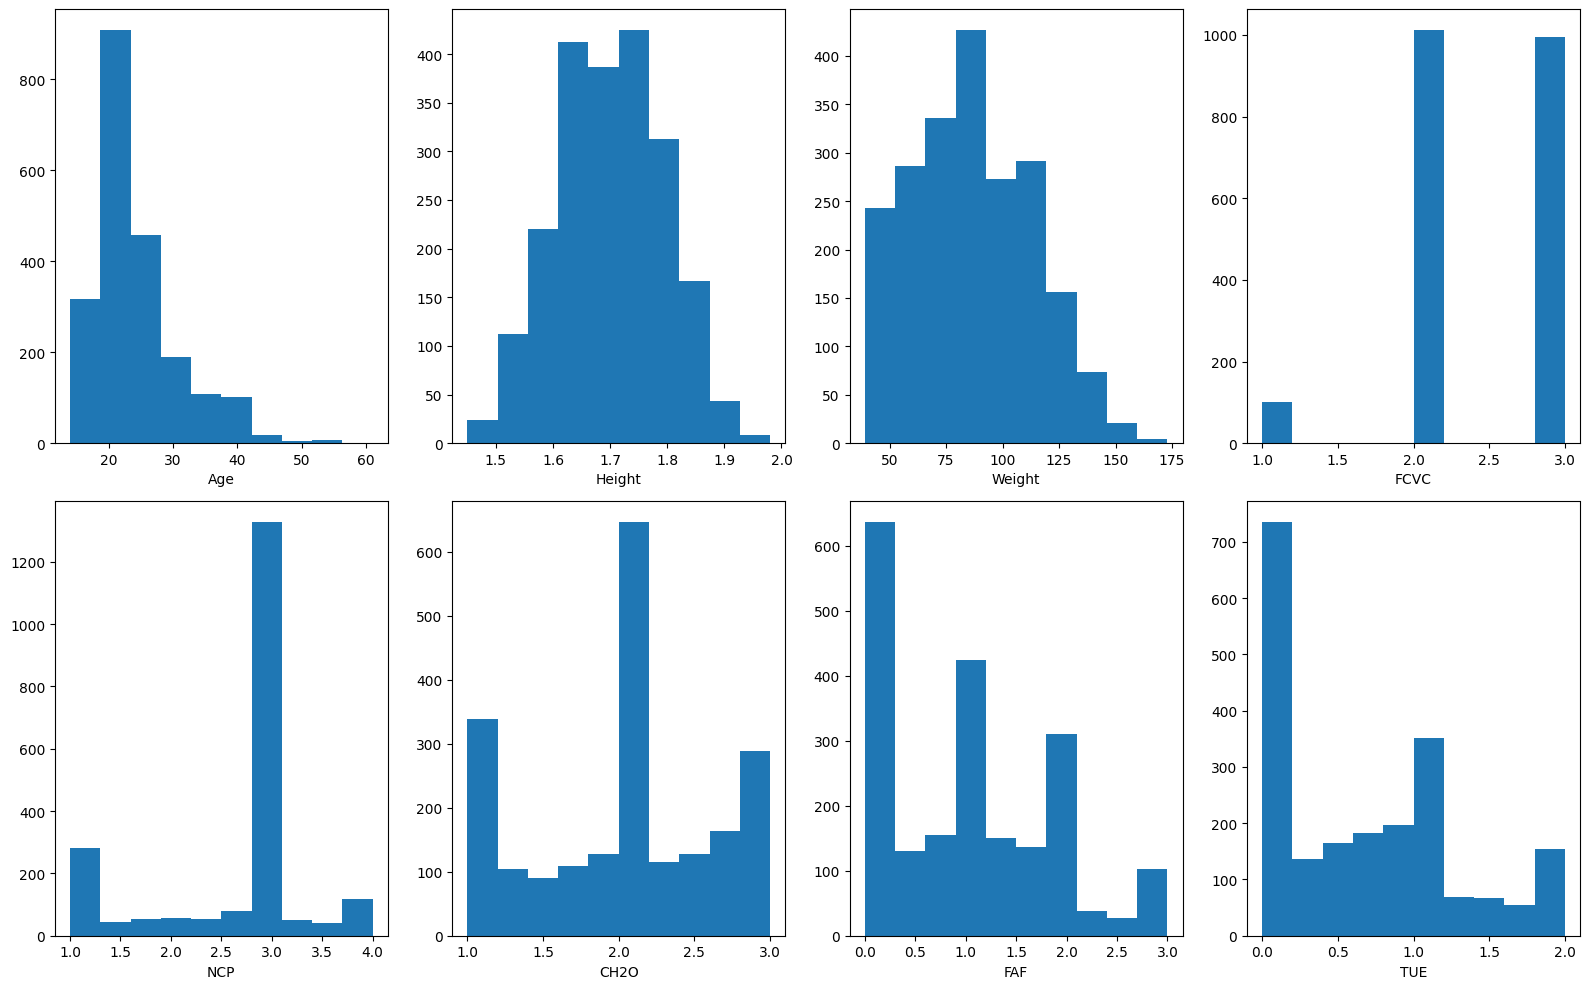

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

axes[0,0].hist(df['Age'])
axes[0,0].set_xlabel('Age')

axes[0,1].hist(df['Height'])
axes[0,1].set_xlabel('Height')

axes[0,2].hist(df['Weight'])
axes[0,2].set_xlabel('Weight')

axes[0,3].hist(df['FCVC'])
axes[0,3].set_xlabel('FCVC')

axes[1,0].hist(df['NCP'])
axes[1,0].set_xlabel('NCP')

axes[1,1].hist(df['CH2O'])
axes[1,1].set_xlabel('CH2O')

axes[1,2].hist(df['FAF'])
axes[1,2].set_xlabel('FAF')

axes[1,3].hist(df['TUE'])
axes[1,3].set_xlabel('TUE')

plt.tight_layout()
plt.show()

##### Из данных графиков видно, что столбцы 'Age', 'Height' и 'Weight' являются непрерывными значениями, а из графиков остальных параметров, а также из описания на Kaggle мы видим, что это категориальные признаки, но имеют какую-то неточность в данных, поэтому следует промежуточные значения привести к категориальным. Также мы видим из данных, что параметры типа object также являются категориальными, и можно привести их к категориальному виду. Для удобства можно переименовать столбцы, так как сейчас не совсем в них отображается смысл величин.

KeyError: 'family_history_with_overweight  '

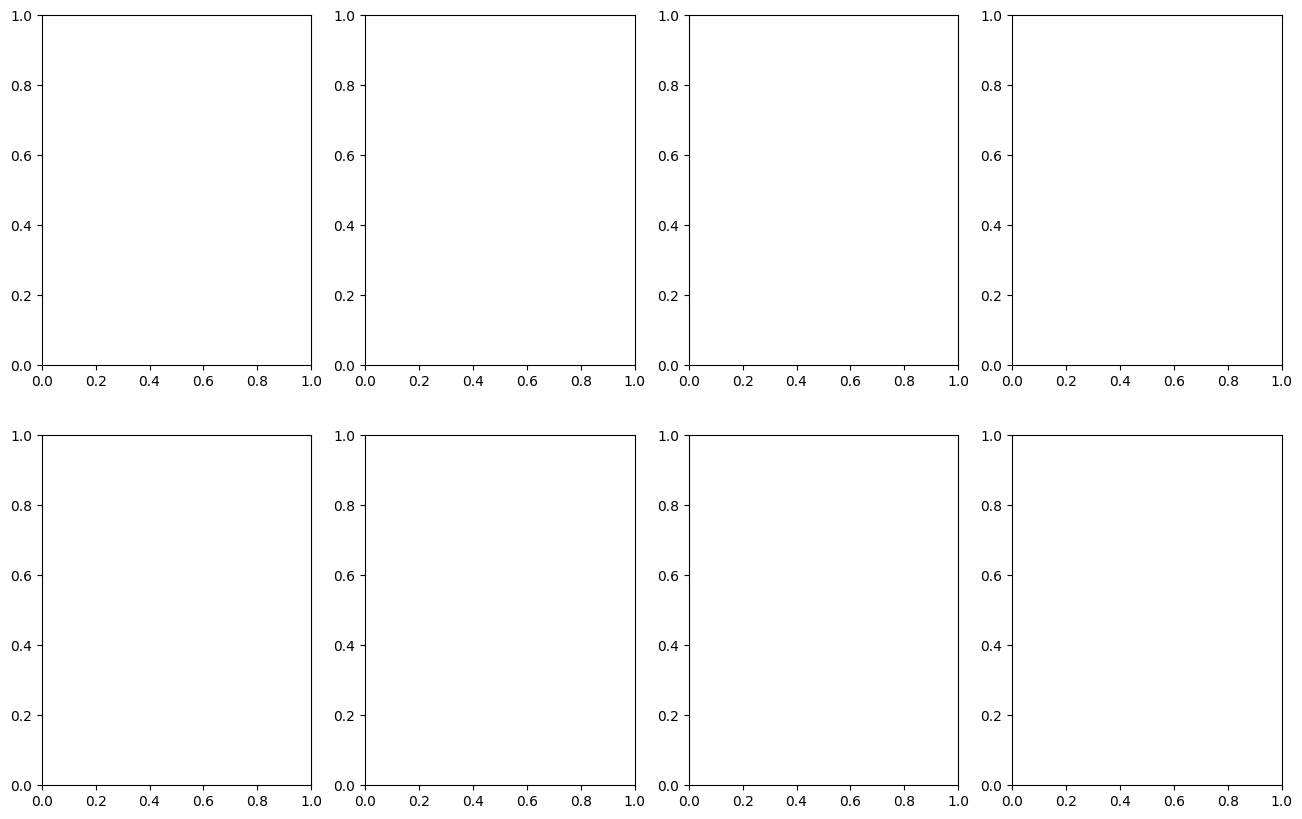

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

axes[0,0].hist(df['family_history_with_overweight  '])
axes[0,0].set_xlabel('family_history_with_overweight  ')

axes[0,1].hist(df['FAVC'])
axes[0,1].set_xlabel('FAVC')

axes[0,2].hist(df['CAEC'])
axes[0,2].set_xlabel('CAEC')

axes[0,3].hist(df['SMOKE'])
axes[0,3].set_xlabel('SMOKE')

axes[1,0].hist(df['SCC'])
axes[1,0].set_xlabel('SCC')

axes[1,1].hist(df['MTRANS'])
axes[1,1].set_xlabel('MTRANS')

axes[1,2].hist(df['NObeyesdad'])
axes[1,2].set_xlabel('NObeyesdad')

plt.tight_layout()
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

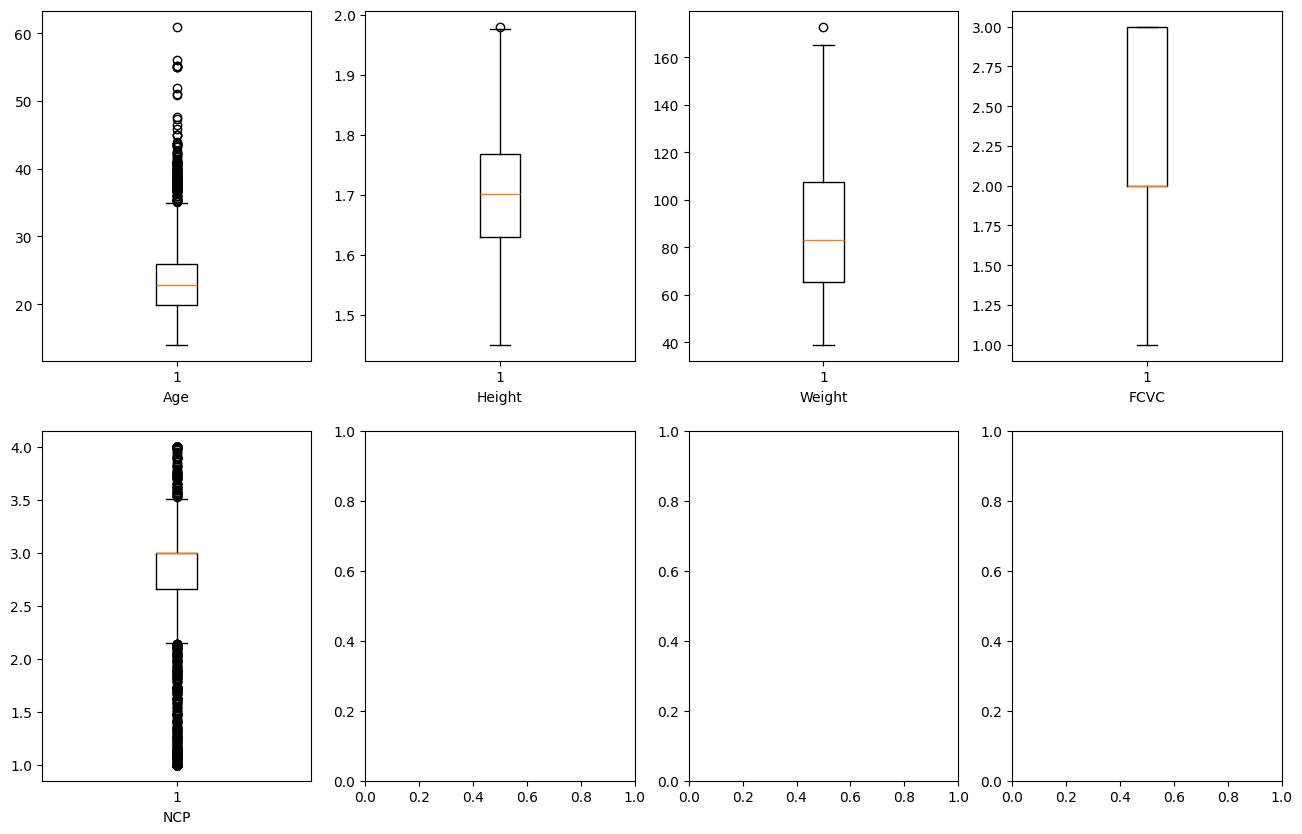

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

axes[0,0].boxplot(df['Age'])
axes[0,0].set_xlabel('Age')

axes[0,1].boxplot(df['Height'])
axes[0,1].set_xlabel('Height')

axes[0,2].boxplot(df['Weight'])
axes[0,2].set_xlabel('Weight')

axes[0,3].boxplot(df['FCVC'])
axes[0,3].set_xlabel('FCVC')

axes[1,0].boxplot(df['NCP'])
axes[1,0].set_xlabel('NCP')

axes[1,1].boxplot(df['CALC'])
axes[1,1].set_xlabel('CALC')

axes[1,2].boxplot(df['FAF'])
axes[1,2].set_xlabel('FAF')

axes[1,3].boxplot(df['TUE'])
axes[1,3].set_xlabel('TUE')

plt.tight_layout()
plt.show()

## Обработка категориальных признаков

In [8]:
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
binary_mapping = {'Female': 0, 'Male': 1, 'no': 0, 'yes': 1}

for col in binary_columns:
    df[col] = df[col].map(binary_mapping)


label_encoder = LabelEncoder()
df['NObeyesdad_encoded'] = label_encoder.fit_transform(df['NObeyesdad'])

In [9]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,Normal_Weight,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,4


In [10]:
df['FCVC'] = df['FCVC'].round()


#encoder = OrdinalEncoder(categories=[['худой', 'средний', 'толстый']])
#df[['Телосложение_число']] = encoder.fit_transform(df[['Телосложение']])